In [1]:
import pandas as pd
import sys
sys.path.append('/Users/petigura/Research/CKS-Cool/')
import keprat.io
reload(keprat.io)

<module 'keprat.io' from 'keprat/io.pyc'>

In [2]:
cks = keprat.io.load_table('cksgaia-planets')
cks.f18_kepmag()

read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf


AttributeError: 'DataFrame' object has no attribute 'f18_kepmag'

In [73]:
%pylab inline
sc = pd.read_table('data/wget_all_prior_SC.bat',comment='#',header=None,names=['line'])
sc['id_kic'] = sc.line.apply(lambda x :x.split('"')[1].split('/')[-1].split('-')[0].replace('kplr','')).astype(int)
cks = keprat.io.load_table('cksgaia-planets')
cks = pd.merge(cks,sc,how='left')
temp = cks.groupby('id_koicand')['line'].count()
print "{}/{} CKS-VII planets have no short cadence".format((temp ==0).sum(),temp.count())
print "{}/{} CKS-VII planets have at least 30 days of short cadence".format((temp >0).sum(),temp.count())
print "{}/{} CKS-VII planets have 90 days of short cadence".format((temp >= 3).sum(),temp.count())

sc = pd.read_table('data/wget_all_prior_SC.bat',comment='#',header=None,names=['line'])
sc['id_kic'] = sc.line.apply(lambda x :x.split('"')[1].split('/')[-1].split('-')[0].replace('kplr','')).astype(int)

Populating the interactive namespace from numpy and matplotlib


/Users/petigura/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


Could not find cache file: load_table_cache.hdf
Building cache...
writing table v18 to cache


keprat/io.py:315: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  columns = [c.split('-')[1] for c in columns]


Cache not built for table: dr25
Building cache...


AssertionError: table ckscool-targets-cuts not valid table name

In [72]:
cks.columns

Index([u'f18_ror', u'f18_srad_err', u'f18_prad', u'f18_srho_err2',
       u'f18_smass_err1', u'f18_ror_err2', u'f18_ror_err1', u'f18_period',
       u'f18_srho_err1', u'f18_smass', u'f18_prad_err', u'f18_srad', u'id_koi',
       u'id_koicand', u'f18_srho', u'f18_smass_err2', u'id_kic', u'v18_Kepler',
       u'v18_ecc', u'v18_period', u'v18_prad', u'v18_rovera', u'v18_ror',
       u'v18_smass', u'v18_srad', u'v18_srho', u'v18_steff', u'v18_smet',
       u'v18_kepmag', u'v18_relrho', u'v18_impact', u'v18_ld1', u'v18_ld2',
       u'v18_ecc_err1', u'v18_ecc_err2', u'v18_period_err1',
       u'v18_period_err2', u'v18_prad_err1', u'v18_prad_err2',
       u'v18_rovera_err1', u'v18_rovera_err2', u'v18_ror_err1',
       u'v18_ror_err2', u'v18_smass_err1', u'v18_smass_err2', u'v18_srad_err1',
       u'v18_srad_err2', u'v18_srho_err1', u'v18_srho_err2', u'v18_steff_err1',
       u'v18_steff_err2', u'v18_smet_err1', u'v18_smet_err2',
       u'v18_relrho_err1', u'v18_relrho_err2', u'v18_impact_err1

In [48]:
t18 = keprat.io.load_table('t18')
t18.columns

Index([u't18_disposition', u't18_score', u't18_period', u't18_period_err1',
       u't18_period_err2', u't18_ror', u't18_ror_err1', u't18_ror_err2',
       u't18_prad', u't18_prad_err1', u't18_prad_err2', u't18_impact',
       u't18_impact_err1', u't18_impact_err2', u'id_kic', u'id_koicand',
       u'id_kepler_name', u't18_max_sngle_ev', u't18_max_mult_ev',
       u't18_model_snr', u't18_count', u't18_num_transits',
       u't18_tce_plnt_num', u't18_tce_delivname', u't18_quarters',
       u't18_bin_oedp_sig', u'id_koi'],
      dtype='object')

In [83]:
cks90 = cks.groupby('id_koicand').mean().loc[temp >= 3]
cks90 = pd.merge(cks90,t18['id_koicand t18_model_snr'.split()],left_index=True,right_on='id_koicand')
med = cks90.median()

print "median cks target with >= 90 days of short cadence data"
print "Rp/Rstar = {:.3f}, model(SNR) = {}, period = {:.1f}".format(med.dr25_RD1_cum,med.t18_model_snr,med.f18_period)

median cks target with >= 90 days of short cadence data
Rp/Rstar = 0.017, model(SNR) = 48.3, period = 11.5


(0.5, 4)

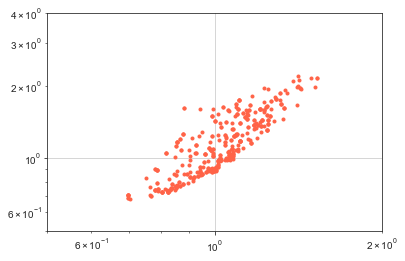

In [78]:
cks90.f18_ror.hist(bins=100)

loglog()
plot(cks90.f18_smass,cks90.f18_srad,'.')
xlim(0.5,2)
ylim(0.5,4)

In [39]:
%pylab inline
sc = pd.read_table('data/wget_all_prior_SC.bat',comment='#',header=None,names=['line'])
sc['id_kic'] = sc.line.apply(lambda x :x.split('"')[1].split('/')[-1].split('-')[0].replace('kplr','')).astype(int)
t18 = keprat.io.load_table('t18')

t18 = keprat.io.load_table('t18')
t18 = t18[~t18.t18_disposition.str.contains('FALS')]

t18 = pd.merge(t18,sc,how='left')
temp = t18.groupby('id_koicand')['line'].count()
print "{}/{} CKS-VII planets have no short cadence".format((temp ==0).sum(),temp.count())
print "{}/{} CKS-VII planets have at least 30 days of short cadence".format((temp >0).sum(),temp.count())
print "{}/{} CKS-VII planets have 90 days of short cadence".format((temp >= 3).sum(),temp.count())

sc = pd.read_table('data/wget_all_prior_SC.bat',comment='#',header=None,names=['line'])
sc['id_kic'] = sc.line.apply(lambda x :x.split('"')[1].split('/')[-1].split('-')[0].replace('kplr','')).astype(int)

Populating the interactive namespace from numpy and matplotlib


/Users/petigura/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


2727/4078 CKS-VII planets have no short cadence
1351/4078 CKS-VII planets have at least 30 days of short cadence
1138/4078 CKS-VII planets have 90 days of short cadence


/Users/petigura/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  from ipykernel import kernelapp as app


Populating the interactive namespace from numpy and matplotlib
376/907 CKS-VII planets have no short cadence
85/907 CKS-VII planets have 30 days of short cadence
437/907 CKS-VII planets have 90 days of short cadence


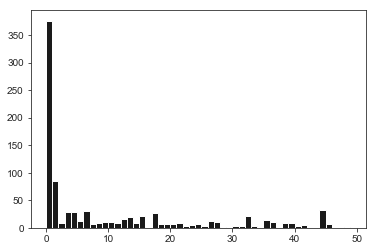

In [12]:
%pylab inline

g = cks.groupby('id_koicand')
temp = g['line'].count()
hist(temp,bins=arange(0,50,1))
print "{}/{} CKS-VII planets have no short cadence".format((temp ==0).sum(),temp.count())
print "{}/{} CKS-VII planets have 30 days of short cadence".format((temp ==1).sum(),temp.count())
print "{}/{} CKS-VII planets have 90 days of short cadence".format((temp >= 3).sum(),temp.count())

In [16]:
test = g.first()

In [21]:
t18.groupby('line').count

In [38]:
cks = keprat.io.load_table('cksgaia-planets')
cks = cks.query('kic_kepmag < 14.2')

read table cksgaia-planets from ../CKS-Gaia/load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf


1249